### Non Vesta Transaction Features
---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f'np=={np.__version__}')
print(f'pd=={pd.__version__}')
print(f'sns=={sns.__version__}')

/var/folders/69/s6p755q576qb2bbk9bc__tr40000gn/T/ipykernel_70907/2515852810.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


np==1.26.4
pd==2.2.0
sns==0.13.2


#### Transaction Features
---
* TransactionID     : Transaction unique identifier
* isFraud           : Is or is not fraud (target feature)
* TransactionDT     : Transaction 'Datetime' (more timedelta from reference point)
* TransactionAmt    : Transaction Amount [USD]
* ProductCD         : Product Codes (W, C, R, H, S)
* card1 - card6     : Payment card info, 
* addr1, addr2      : Address
* dist1, dist2      : Distance
* P_emaildomain     : Purchaser email domain
* R_emaildomain     : Reciever email domain
* C1 - C14          : (float) Counting, (e.g. num adresses to be associated with payment card etc, Exact meaning is masked)
* D1 - D15          : (float) Timedelta, (e.g. num days after last transaction)
* M1 - M9           : (object) Match, (e.g. name on card and adress)

#### Categorical Features - Transaction
---
* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

In [4]:
transaction_features = [
    'TransactionID',    # Unique identifier
    'isFraud',          # Target feature
    'TransactionDT', 'TransactionAmt', 'ProductCD', 
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6',   # card details (purchaser)
    'addr1', 'addr2', 
    'dist1', 'dist2', 
    'P_emaildomain', 'R_emaildomain', 
    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',            # counting features
    'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15',     # timedelta features
    'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'                                                # matching features
]

In [5]:
# test_transaction = pd.read_csv('/Users/oskarwallberg/desktop/kaggle-datasets/ieee-fraud-detection/test_transaction.csv')
# print(test_transaction.shape)
train_transaction = pd.read_csv('/Users/oskarwallberg/desktop/kaggle-datasets/ieee-fraud-detection/train_transaction.csv')
print(train_transaction.shape)

(590540, 394)


In [6]:
train_transaction = train_transaction[transaction_features].copy()
is_fraud = train_transaction['isFraud']

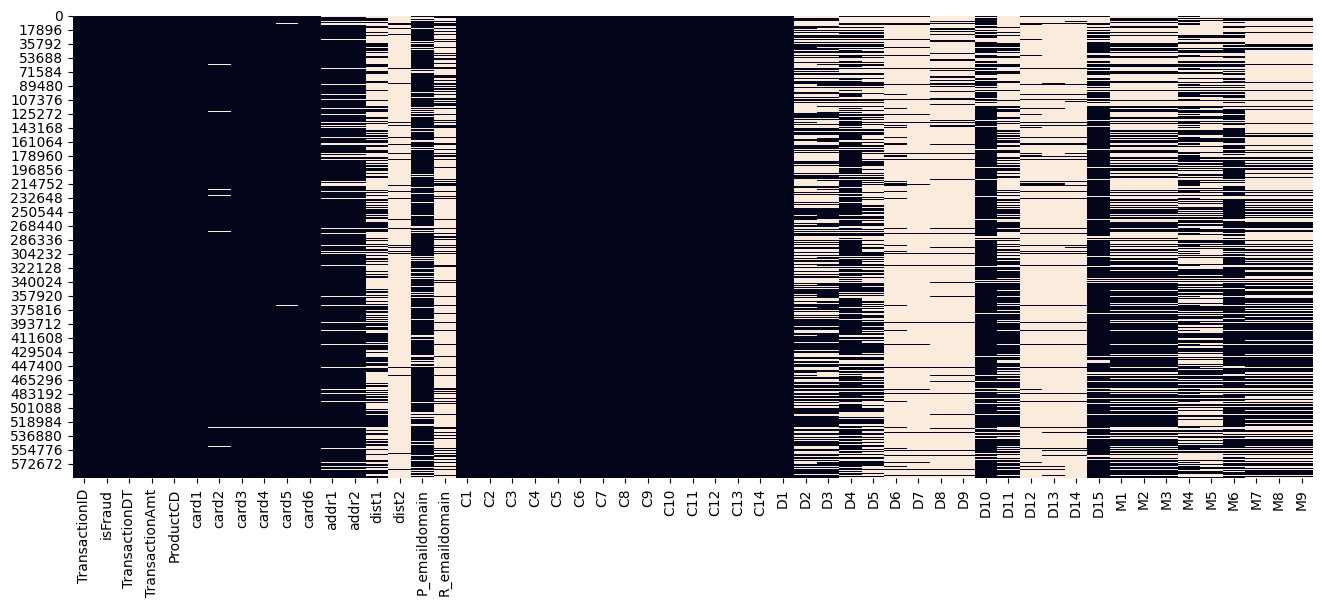

In [9]:
plt.figure(figsize=(16, 6))
sns.heatmap(data=train_transaction.isna(), cbar=False)
plt.show()

In [10]:
# Fully populated by UIDs
train_transaction['TransactionID'].nunique() == train_transaction.shape[0]

True

In [11]:
card_detail_features = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
train_transaction[card_detail_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   card1   590540 non-null  int64  
 1   card2   581607 non-null  float64
 2   card3   588975 non-null  float64
 3   card4   588963 non-null  object 
 4   card5   586281 non-null  float64
 5   card6   588969 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 27.0+ MB


In [12]:
train_transaction[card_detail_features].describe().T

,count,mean,std,min,25%,50%,75%,max
card1,590540.0,9898.734658,4901.170153,1000.0,6019.0,9678.0,14184.0,18396.0
card2,581607.0,362.555488,157.793246,100.0,214.0,361.0,512.0,600.0
card3,588975.0,153.194925,11.336444,100.0,150.0,150.0,150.0,231.0
card5,586281.0,199.278897,41.244453,100.0,166.0,226.0,226.0,237.0


In [13]:
# fradulent transactions are almost always done on cards with valid transactions
# NOTE entire card (client) is then flagged as fraud!
train_transaction['card1'][is_fraud==1].nunique(), \
train_transaction['card1'][is_fraud==0].nunique(), \
train_transaction['card1'].nunique()

(1740, 13350, 13553)

In [14]:
train_transaction['addr1'].value_counts().reset_index()

,addr1,count
0,299.0,46335
1,325.0,42751
2,204.0,42020
3,264.0,39870
4,330.0,26287
...,...,...
327,386.0,1
328,101.0,1
329,353.0,1
330,516.0,1


In [15]:
print(train_transaction['addr1'].isna().sum(), train_transaction['addr2'].isna().sum())
train_transaction[['addr1', 'addr2']].value_counts().reset_index()

# addr1 is probably address of purchaser
# addr2 is probably address of recipient (bank as the 87 is by far the most dominant target)

65706 65706


,addr1,addr2,count
0,299.0,87.0,46324
1,325.0,87.0,42748
2,204.0,87.0,42018
3,264.0,87.0,39870
4,330.0,87.0,26284
...,...,...,...
432,338.0,60.0,1
433,340.0,87.0,1
434,343.0,27.0,1
435,200.0,26.0,1


In [16]:
(train_transaction['TransactionDT'].describe().T - 86400) / 86400

count      5.834954
mean      84.327677
std       52.440089
min        0.000000
25%       34.035391
50%       83.566291
75%      129.169213
max      181.999201
Name: TransactionDT, dtype: float64

In [17]:
# 97% of transactions happened at separate times (one second or more apart)
train_transaction['TransactionDT'].nunique() / train_transaction.shape[0]

0.9708893555051309

In [18]:
train_transaction.shape[0]

590540

In [19]:
train_transaction[['TransactionID', 'card1', 'addr1', 'D1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  590540 non-null  int64  
 1   card1          590540 non-null  int64  
 2   addr1          524834 non-null  float64
 3   D1             589271 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 18.0 MB


In [ ]:
print(f"Unique ids  : {train_transaction['TransactionID'].nunique()}")
print(f'Number rows : {train_transaction.shape[0]}')

In [ ]:
# fill NaNs before groupby
train_transaction['D1n'] = train_transaction['TransactionDT'] // (24*60*60) - train_transaction['D1']
group_by_cols = ['card1', 'addr1', 'D1n']
train_transaction[group_by_cols] = train_transaction[group_by_cols].fillna(-1)
train_transaction['uid'] = train_transaction.groupby(group_by_cols).ngroup()
train_transaction['uid'].nunique()


In [ ]:
train_transaction['isFraud'].sum() / train_transaction['isFraud'].shape[0]

# oversampling - syntetisera data för den positiva klassen FARLIGT!



# undersampling - tar bort från överrepresenterade klassen